# DataFrames and Series

In [69]:
import pandas as pd

df = pd.read_csv('data/gapminder/inst/extdata/gapminder.tsv', sep='\t')

print(type(df))
print(df.shape)
print(df.columns)

print("DataFrame is made up of series, which are columns with the same type of data")
print(type(df.columns))
print(df.dtypes)
print('First row accessed by the location (coincidentally a number):\n', df.loc[0], sep='')
print('Last row - notice that "i" refers to the index:\n', df.iloc[-1], sep='')
print('Last row - using the known shape:\n', df.loc[df.shape[0] - 1], sep='')

subset = df[['country','continent','year']]
print("Notice that this returns an object",type(df.iloc[0]))
print("Notice that this returns a series, not a single object",type(subset.tail(1)))

print("You can mix these together too, rows then columns:\n", df.loc[:,['year','pop']], sep='')
print("Numbers are fine too:\n", df.iloc[[0,3],[2,4,-1]], sep='')
print("Python's ranges work too\n", df.iloc[:,list(range(2,4))])
print("Check out this range, skips every other:", list(range(0,10,2)))
print("Check slicers, :2 gets first 2:", list(range(0,10,2))[:2])
print("Check slicers, 2: last 2:", list(range(0,10,2))[2:])

ModuleNotFoundError: No module named 'matplotlib'

# Slicing is weird...

In [55]:
print(df.iloc[:1,0:6])

print("this has no noticeable affect?")
print(df.iloc[:1,0:6:])

print("0 and the two at the end")
print(df.iloc[:1,0::2])


print("0 and the two at the end")
print(df.iloc[:1,::2])

print("All")
print(df.iloc[:1,::])

       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314
this has no noticeable affect?
       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314
0 and the two at the end
       country  year      pop
0  Afghanistan  1952  8425333
0 and the two at the end
       country  year      pop
0  Afghanistan  1952  8425333
       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314


# Grouping

In [59]:
print("Single columns are easy")
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [61]:
print("What if you want to do more than one?")
multigroup = df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()
print(multigroup)

What if you want to do more than one?
                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
  

In [62]:
print("You can flatten, if you like with reset_index()")
print(multigroup.reset_index())

You can flatten, if you like with reset_index()
    year continent    lifeExp     gdpPercap
0   1952    Africa  39.135500   1252.572466
1   1952  Americas  53.279840   4079.062552
2   1952      Asia  46.314394   5195.484004
3   1952    Europe  64.408500   5661.057435
4   1952   Oceania  69.255000  10298.085650
5   1957    Africa  41.266346   1385.236062
6   1957  Americas  55.960280   4616.043733
7   1957      Asia  49.318544   5787.732940
8   1957    Europe  66.703067   6963.012816
9   1957   Oceania  70.295000  11598.522455
10  1962    Africa  43.319442   1598.078825
11  1962  Americas  58.398760   4901.541870
12  1962      Asia  51.563223   5729.369625
13  1962    Europe  68.539233   8365.486814
14  1962   Oceania  71.085000  12696.452430
15  1967    Africa  45.334538   2050.363801
16  1967  Americas  60.410920   5668.253496
17  1967      Asia  54.663640   5971.173374
18  1967    Europe  69.737600  10143.823757
19  1967   Oceania  71.310000  14495.021790
20  1972    Africa  47.45094

In [63]:
print("other interesting methods: nunique")
print(df.groupby(['year','continent'])[['lifeExp','gdpPercap']].nunique())

other interesting methods: nunique
                lifeExp  gdpPercap
year continent                    
1952 Africa          52         52
     Americas        25         25
     Asia            33         33
     Europe          30         30
     Oceania          2          2
1957 Africa          52         52
     Americas        25         25
     Asia            33         33
     Europe          30         30
     Oceania          2          2
1962 Africa          52         52
     Americas        25         25
     Asia            33         33
     Europe          29         30
     Oceania          2          2
1967 Africa          52         52
     Americas        25         25
     Asia            33         33
     Europe          30         30
     Oceania          2          2
1972 Africa          52         52
     Americas        25         25
     Asia            33         33
     Europe          30         30
     Oceania          2          2
1977 Africa         

Best part has to be the plots though


<AxesSubplot:xlabel='year'>

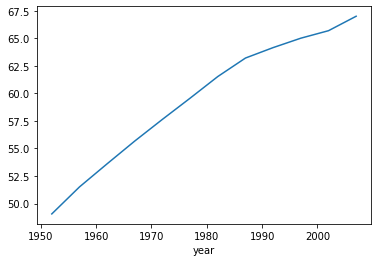

In [70]:
print("Best part has to be the plots though")
df.groupby("year")['lifeExp'].mean().plot()